# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("/datasets/users_behavior.csv")
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [3]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Видим, что тариф ультра используют 30.64% пользователей из нашей базы.

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


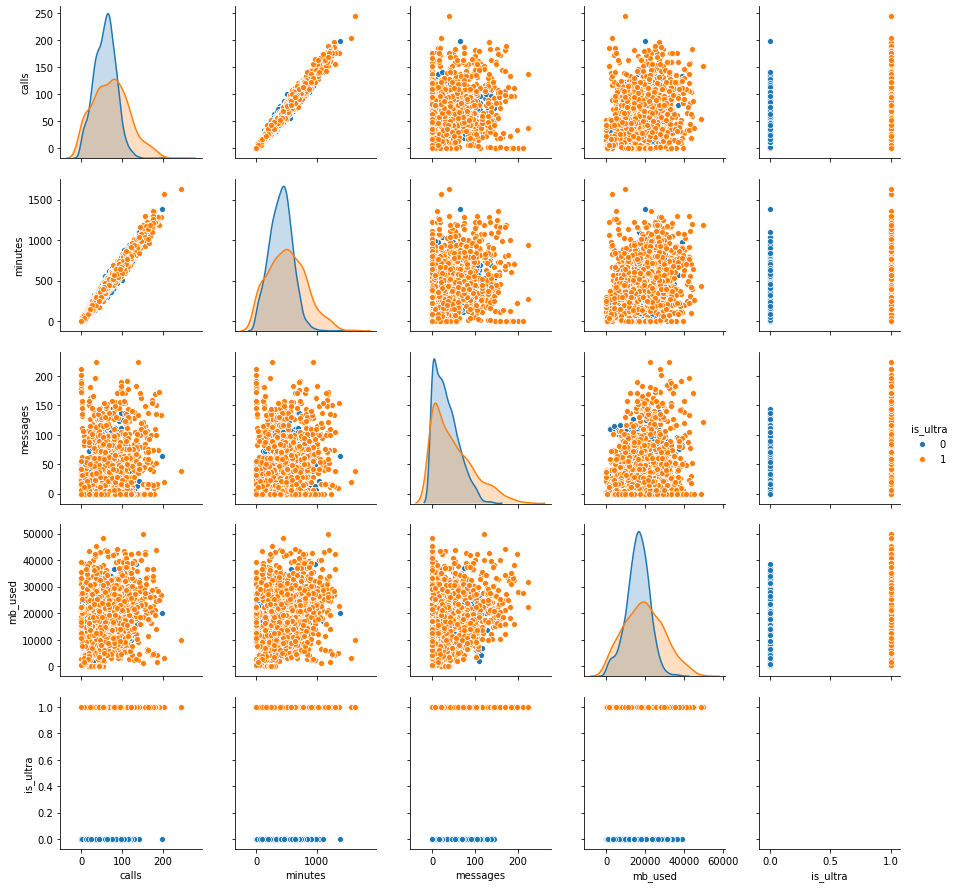

In [4]:
sns.pairplot(df, hue="is_ultra")

## Разбейте данные на выборки

Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1 (60%-20%-20%).

In [5]:
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=123)
df_valid, df_test = train_test_split(df_valid,test_size=0.5, random_state=123)
print(len(df_train))
print(len(df_valid))
print(len(df_test))

1928
643
643


## Исследуйте модели

In [6]:
features_train = df_train.drop(columns='is_ultra')
target_train = df_train['is_ultra']
features_valid = df_valid.drop(columns='is_ultra')
target_valid = df_valid['is_ultra']
features_test = df_test.drop(columns='is_ultra')
target_test = df_test['is_ultra']
features_test.head()

,calls,minutes,messages,mb_used
2619,37.0,229.12,0.0,27782.77
1878,156.0,1044.13,149.0,26649.18
1814,41.0,273.09,8.0,25761.38
1205,65.0,444.02,77.0,9753.24
2936,59.0,409.21,31.0,19638.50


In [7]:
# DecisionTreeClassifier
best_depth=0
best_score=0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=123, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions)
    if score > best_score:
        best_score = score
        best_depth = depth
    print('depth =', depth, 'accuracy =', score)
print()
print('best_depth =', best_depth, 'best_accuracy =', best_score)

depth = 1 accuracy = 0.7620528771384136
depth = 2 accuracy = 0.7900466562986003
depth = 3 accuracy = 0.80248833592535
depth = 4 accuracy = 0.8040435458786936
depth = 5 accuracy = 0.8227060653188181
depth = 6 accuracy = 0.8149300155520995
depth = 7 accuracy = 0.8118195956454122
depth = 8 accuracy = 0.80248833592535
depth = 9 accuracy = 0.8180404354587869

best_depth = 5 best_accuracy = 0.8227060653188181


In [8]:
# RandomForestClassifier
best_est=0
best_score=0
for est in range(1, 42):    
    model = RandomForestClassifier(random_state=123, n_estimators=est)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions)   
    if score > best_score:
        best_score = score
        best_est = est
   # print('est =', est, 'accuracy =', score)
print()
print('best_est =', best_est, 'best_accuracy =', best_score)


best_est = 38 best_accuracy = 0.8289269051321928


In [9]:
# LogisticRegression
model = LogisticRegression(random_state=123)
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)
result

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7200622083981337

### Вывод
Лучше всех показала себя модель обученная "случайным лесом", его  accuracy = 0.829 (при колличестве деревьев = 38). 

Немного отстает модель обученная "решающим деревом", его accuracy = 0.823 (при глубине дерева = 5).

Хуже всех себя показала "логистическая регрессия", его accuracy = 0.720

## Проверьте модель на тестовой выборке

Так как 2 модели показали близкие значения accuracy, проверим все 3 модели на тестовой выборке в порядке от лучшего к худшему:

In [10]:
model = RandomForestClassifier(random_state=123, n_estimators=38)
model.fit(features_train,target_train)
predictions = model.predict(features_test)
score = accuracy_score(target_test, predictions)
print('RandomForestClassifier accuracy:', score)
print()
model = DecisionTreeClassifier(random_state=123, max_depth=5)
model.fit(features_train,target_train)
predictions = model.predict(features_test)
score = accuracy_score(target_test, predictions)
print('DecisionTreeClassifier accuracy:', score)
print()
model = LogisticRegression(random_state=123)
model.fit(features_train, target_train)
score = model.score(features_test, target_test)
print('LogisticRegression accuracy:', score)

RandomForestClassifier accuracy: 0.8009331259720062

DecisionTreeClassifier accuracy: 0.7713841368584758

LogisticRegression accuracy: 0.6967340590979783


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Вывод
На тестовой выборке так же лучше всех себя показала модель обученная "случайным лесом", его accuracy = 0.80, что ниже чем на на валидационной выборке на 0.029, что говорит о некоторой переобученности модели. 

Модель обученная "решающим деревом" показала понижение accuracy более чем на 0.05 (модель переобучена).

## Вывод

Разделили данные на 3 выборки: обучающую, валидационную и тестовую.

Обучили модели: "случайным лесом", "решающим деревом",  "логистической регрессией".

Модель обученная "случайным лесом" (при колличестве деревьев = 38) показала лучший результат аccuracy на тестовой выборке: 0.80.

Поскольку возможных целевых признаков 2 (является тариф "ультра" или нет), то модель с показателем accuracy более 0.5 может считатся адекватной. Или даже если предсказывая тариф, всегда отвечать "смарт" (как самый распространенный тариф) их в выборке чуть менее 70%, а значит при значении accuracy более 0.7 модель может считатся адекватной. Наша модель имеет значение 0.80, следовательно она адекватная.